# Hackaton AI/ML Aston 2022 - Team Machine Learners
## Data Science for Healthcare
- Adrash Viju Kumar
- Nithin Mathew Joseph
- Nikee Gandhi
- Riccardo Sottini

In [3]:
# Install the libraries that will be used in the Data Mining Process
!pip install boruta
!pip install imblearn

In [25]:
# Import the libraries that will be used in the Data Mining Process
from pandas import Series, DataFrame
from collections import Counter
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from boruta import BorutaPy
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle

# Initialise certain libraries with default parameters values
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.filterwarnings('ignore')

In [5]:
# Initialise the DataFrame by importing the data from the CSV file df_train
df = pd.read_csv('/Users/nikki/Desktop/Hackathon/data_for_activity/df_train.csv')

# Show the first 5 records of the DataFrame
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_window,Info_cluster,Info_split,Class,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,feat_local_AAtypes_Acidic,feat_local_Atoms_nC,feat_local_Atoms_nH,feat_local_Atoms_nN,feat_local_Atoms_nO,feat_local_Atoms_nS,feat_local_AAC_A,feat_local_AAC_R,feat_local_AAC_N,feat_local_AAC_D,feat_local_AAC_C,feat_local_AAC_E,feat_local_AAC_Q,feat_local_AAC_G,feat_local_AAC_H,feat_local_AAC_I,feat_local_AAC_L,feat_local_AAC_K,feat_local_AAC_M,feat_local_AAC_F,feat_local_AAC_P,feat_local_AAC_S,feat_local_AAC_T,feat_local_AAC_W,feat_local_AAC_Y,feat_local_AAC_V,feat_local_CTDC_hydrophobicity.Group1,feat_local_CTDC_hydrophobicity.Group2,feat_local_CTDC_hydrophobicity.Group3,feat_local_CTDC_normwaalsvolume.Group1,feat_local_CTDC_normwaalsvolume.Group2,feat_local_CTDC_normwaalsvolume.Group3,feat_local_CTDC_polarity.Group1,feat_local_CTDC_polarity.Group2,feat_local_CTDC_polarity.Group3,feat_local_CTDC_polarizability.Group1,feat_local_CTDC_polarizability.Group2,feat_local_CTDC_polarizability.Group3,feat_local_CTDC_charge.Group1,feat_local_CTDC_charge.Group2,feat_local_CTDC_charge.Group3,feat_local_CTDC_secondarystruct.Group1,feat_local_CTDC_secondarystruct.Group2,feat_local_CTDC_secondarystruct.Group3,feat_local_CTDC_solventaccess.Group1,feat_local_CTDC_solventaccess.Group2,feat_local_CTDC_solventaccess.Group3,feat_local_CTDD_prop1.G1.residue0,feat_local_CTDD_prop1.G1.residue25,feat_local_CTDD_prop1.G1.residue50,feat_local_CTDD_prop1.G1.residue75,feat_local_CTDD_prop1.G1.residue100,feat_local_CTDD_prop1.G2.residue0,feat_local_CTDD_prop1.G2.residue25,feat_local_CTDD_prop1.G2.residue50,feat_local_CTDD_prop1.G2.residue75,feat_local_CTDD_prop1.G2.residue100,feat_local_CTDD_prop1.G3.residue0,feat_local_CTDD_prop1.G3.residue25,feat_local_CTDD_prop1.G3.residue50,feat_local_CTDD_prop1.G3.residue75,feat_local_CTDD_prop1.G3.residue100,feat_local_CTDD_prop2.G1.residue0,feat_local_CTDD_prop2.G1.residue25,feat_local_CTDD_prop2.G1.residue50,feat_local_CTDD_prop2.G1.residue75,feat_local_CTDD_prop2.G1.residue100,feat_local_CTDD_prop2.G2.residue0,feat_local_CTDD_prop2.G2.residue25,feat_local_CTDD_prop2.G2.residue50,feat_local_CTDD_prop2.G2.residue75,feat_local_CTDD_prop2.G2.residue100,feat_local_CTDD_prop2.G3.residue0,feat_local_CTDD_prop2.G3.residue25,feat_local_CTDD_prop2.G3.residue50,feat_local_CTDD_prop2.G3.residue75,feat_local_CTDD_prop2.G3.residue100,feat_local_CTDD_prop3.G1.residue0,feat_local_CTDD_prop3.G1.residue25,feat_local_CTDD_prop3.G1.residue50,feat_local_CTDD_prop3.G1.residue75,feat_local_CTDD_prop3.G1.residue100,feat_local_CTDD_prop3.G2.residue0,feat_local_CTDD_prop3.G2.residue25,feat_local_CTDD_prop3.G2.residue50,feat_local_CTDD_prop3.G2.residue75,feat_local_CTDD_prop3.G2.residue100,feat_local_CTDD_prop3.G3.residue0,feat_local_CTDD_prop3.G3.residue25,feat_local_CTDD_prop3.G3.residue50,feat_local_CTDD_prop3.G3.residue75,feat_local_CTDD_prop3.G3.residue100,feat_local_CTDD_prop4.G1.residue0,feat_local_CTDD_prop4.G1.residue25,feat_local_CTDD_prop4.G1.residue50,feat_local_CTDD_prop4.G1.residue75,feat_local_CTDD_prop4.G1.residue100,feat_local_CTDD_prop4.G2.residue0,feat_local_CTDD_prop4.G2.residue25,feat_local_CTDD_prop4.G2.residue50,feat_local_CTDD_prop4.G2.residue75,feat_local_CTDD_prop4.G2.residue100,feat_local_CTDD_prop4.G3.residue0,feat_local_CTDD_prop4.G3.residue25,feat_local_CTDD_prop4.G3.residue50,feat_local_CTDD_prop4.G3.residue75,feat_local_CTDD_prop4.G3.residue100,feat_local_CTDD_prop5.G1.residue0,feat_local_CTDD_prop5.G1.residue25,feat_local_CTDD_prop5.G1.residue50,feat_local_CTDD_prop5.G1.residue75,feat_local_CTDD_prop5.G1.residue100,feat_local_CTDD_prop5.G2.residue0,feat_local_CTDD_prop5.G2.residue25,feat_local_C

In [6]:
###
# removeInfo() - function used to remove the columns starting with Info_, excluding Info_cluster
# modifies the DataFrame instance by removing certain columns
###
def removeInfo():
    global df
    
    # Loop through each column of the DataFrame
    for column in df.columns:
        # Drop the column in the case in which it starts with Info_ and it is not the Info_cluster column
        if 'Info_' in column and column != 'Info_cluster':
            df = df.drop(column, axis = 1)

# Call the function to remove the irrelevant columns
removeInfo()
            
# Show the first 5 records of the DataFrame after the irrelevant columns have been removed
df.head()

,Info_cluster,Class,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,feat_local_AAtypes_Acidic,feat_local_Atoms_nC,feat_local_Atoms_nH,feat_local_Atoms_nN,feat_local_Atoms_nO,feat_local_Atoms_nS,feat_local_AAC_A,feat_local_AAC_R,feat_local_AAC_N,feat_local_AAC_D,feat_local_AAC_C,feat_local_AAC_E,feat_local_AAC_Q,feat_local_AAC_G,feat_local_AAC_H,feat_local_AAC_I,feat_local_AAC_L,feat_local_AAC_K,feat_local_AAC_M,feat_local_AAC_F,feat_local_AAC_P,feat_local_AAC_S,feat_local_AAC_T,feat_local_AAC_W,feat_local_AAC_Y,feat_local_AAC_V,feat_local_CTDC_hydrophobicity.Group1,feat_local_CTDC_hydrophobicity.Group2,feat_local_CTDC_hydrophobicity.Group3,feat_local_CTDC_normwaalsvolume.Group1,feat_local_CTDC_normwaalsvolume.Group2,feat_local_CTDC_normwaalsvolume.Group3,feat_local_CTDC_polarity.Group1,feat_local_CTDC_polarity.Group2,feat_local_CTDC_polarity.Group3,feat_local_CTDC_polarizability.Group1,feat_local_CTDC_polarizability.Group2,feat_local_CTDC_polarizability.Group3,feat_local_CTDC_charge.Group1,feat_local_CTDC_charge.Group2,feat_local_CTDC_charge.Group3,feat_local_CTDC_secondarystruct.Group1,feat_local_CTDC_secondarystruct.Group2,feat_local_CTDC_secondarystruct.Group3,feat_local_CTDC_solventaccess.Group1,feat_local_CTDC_solventaccess.Group2,feat_local_CTDC_solventaccess.Group3,feat_local_CTDD_prop1.G1.residue0,feat_local_CTDD_prop1.G1.residue25,feat_local_CTDD_prop1.G1.residue50,feat_local_CTDD_prop1.G1.residue75,feat_local_CTDD_prop1.G1.residue100,feat_local_CTDD_prop1.G2.residue0,feat_local_CTDD_prop1.G2.residue25,feat_local_CTDD_prop1.G2.residue50,feat_local_CTDD_prop1.G2.residue75,feat_local_CTDD_prop1.G2.residue100,feat_local_CTDD_prop1.G3.residue0,feat_local_CTDD_prop1.G3.residue25,feat_local_CTDD_prop1.G3.residue50,feat_local_CTDD_prop1.G3.residue75,feat_local_CTDD_prop1.G3.residue100,feat_local_CTDD_prop2.G1.residue0,feat_local_CTDD_prop2.G1.residue25,feat_local_CTDD_prop2.G1.residue50,feat_local_CTDD_prop2.G1.residue75,feat_local_CTDD_prop2.G1.residue100,feat_local_CTDD_prop2.G2.residue0,feat_local_CTDD_prop2.G2.residue25,feat_local_CTDD_prop2.G2.residue50,feat_local_CTDD_prop2.G2.residue75,feat_local_CTDD_prop2.G2.residue100,feat_local_CTDD_prop2.G3.residue0,feat_local_CTDD_prop2.G3.residue25,feat_local_CTDD_prop2.G3.residue50,feat_local_CTDD_prop2.G3.residue75,feat_local_CTDD_prop2.G3.residue100,feat_local_CTDD_prop3.G1.residue0,feat_local_CTDD_prop3.G1.residue25,feat_local_CTDD_prop3.G1.residue50,feat_local_CTDD_prop3.G1.residue75,feat_local_CTDD_prop3.G1.residue100,feat_local_CTDD_prop3.G2.residue0,feat_local_CTDD_prop3.G2.residue25,feat_local_CTDD_prop3.G2.residue50,feat_local_CTDD_prop3.G2.residue75,feat_local_CTDD_prop3.G2.residue100,feat_local_CTDD_prop3.G3.residue0,feat_local_CTDD_prop3.G3.residue25,feat_local_CTDD_prop3.G3.residue50,feat_local_CTDD_prop3.G3.residue75,feat_local_CTDD_prop3.G3.residue100,feat_local_CTDD_prop4.G1.residue0,feat_local_CTDD_prop4.G1.residue25,feat_local_CTDD_prop4.G1.residue50,feat_local_CTDD_prop4.G1.residue75,feat_local_CTDD_prop4.G1.residue100,feat_local_CTDD_prop4.G2.residue0,feat_local_CTDD_prop4.G2.residue25,feat_local_CTDD_prop4.G2.residue50,feat_local_CTDD_prop4.G2.residue75,feat_local_CTDD_prop4.G2.residue100,feat_local_CTDD_prop4.G3.residue0,feat_local_CTDD_prop4.G3.residue25,feat_local_CTDD_prop4.G3.residue50,feat_local_CTDD_prop4.G3.residue75,feat_local_CTDD_prop4.G3.residue100,feat_local_CTDD_prop5.G1.residue0,feat_local_CTDD_prop5.G1.residue25,feat_local_CTDD_prop5.G1.residue50,feat_local_CTDD_prop5.G1.residue75,feat_local_CTDD_prop5.G1.residue100,feat_local_CTDD_prop5.G2.residue0,feat_local_CTDD_prop5.G2.residue25,feat_local_CTDD_prop5.G2.residue50,feat_local_CTDD_prop5.G2.residue75,feat_local_CTDD_prop5.G2.residue100,feat_local_CTDD_prop5.G3.residue0,feat_local_CTDD_prop

In [7]:
# Print the number of records and columns - result: 76740 records x 387 columns
df.shape

(76740, 387)

In [8]:
# Print the number of values that are null - result: 0, which means that there are no null values in the DataFrame
df.isnull().any().sum()

0

In [9]:
# Print a description of each column within the DataFrame (count, mean, standard, quantile and max value)
df.describe()

,Info_cluster,Class,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,feat_local_AAtypes_Acidic,feat_local_Atoms_nC,feat_local_Atoms_nH,feat_local_Atoms_nN,feat_local_Atoms_nO,feat_local_Atoms_nS,feat_local_AAC_A,feat_local_AAC_R,feat_local_AAC_N,feat_local_AAC_D,feat_local_AAC_C,feat_local_AAC_E,feat_local_AAC_Q,feat_local_AAC_G,feat_local_AAC_H,feat_local_AAC_I,feat_local_AAC_L,feat_local_AAC_K,feat_local_AAC_M,feat_local_AAC_F,feat_local_AAC_P,feat_local_AAC_S,feat_local_AAC_T,feat_local_AAC_W,feat_local_AAC_Y,feat_local_AAC_V,feat_local_CTDC_hydrophobicity.Group1,feat_local_CTDC_hydrophobicity.Group2,feat_local_CTDC_hydrophobicity.Group3,feat_local_CTDC_normwaalsvolume.Group1,feat_local_CTDC_normwaalsvolume.Group2,feat_local_CTDC_normwaalsvolume.Group3,feat_local_CTDC_polarity.Group1,feat_local_CTDC_polarity.Group2,feat_local_CTDC_polarity.Group3,feat_local_CTDC_polarizability.Group1,feat_local_CTDC_polarizability.Group2,feat_local_CTDC_polarizability.Group3,feat_local_CTDC_charge.Group1,feat_local_CTDC_charge.Group2,feat_local_CTDC_charge.Group3,feat_local_CTDC_secondarystruct.Group1,feat_local_CTDC_secondarystruct.Group2,feat_local_CTDC_secondarystruct.Group3,feat_local_CTDC_solventaccess.Group1,feat_local_CTDC_solventaccess.Group2,feat_local_CTDC_solventaccess.Group3,feat_local_CTDD_prop1.G1.residue0,feat_local_CTDD_prop1.G1.residue25,feat_local_CTDD_prop1.G1.residue50,feat_local_CTDD_prop1.G1.residue75,feat_local_CTDD_prop1.G1.residue100,feat_local_CTDD_prop1.G2.residue0,feat_local_CTDD_prop1.G2.residue25,feat_local_CTDD_prop1.G2.residue50,feat_local_CTDD_prop1.G2.residue75,feat_local_CTDD_prop1.G2.residue100,feat_local_CTDD_prop1.G3.residue0,feat_local_CTDD_prop1.G3.residue25,feat_local_CTDD_prop1.G3.residue50,feat_local_CTDD_prop1.G3.residue75,feat_local_CTDD_prop1.G3.residue100,feat_local_CTDD_prop2.G1.residue0,feat_local_CTDD_prop2.G1.residue25,feat_local_CTDD_prop2.G1.residue50,feat_local_CTDD_prop2.G1.residue75,feat_local_CTDD_prop2.G1.residue100,feat_local_CTDD_prop2.G2.residue0,feat_local_CTDD_prop2.G2.residue25,feat_local_CTDD_prop2.G2.residue50,feat_local_CTDD_prop2.G2.residue75,feat_local_CTDD_prop2.G2.residue100,feat_local_CTDD_prop2.G3.residue0,feat_local_CTDD_prop2.G3.residue25,feat_local_CTDD_prop2.G3.residue50,feat_local_CTDD_prop2.G3.residue75,feat_local_CTDD_prop2.G3.residue100,feat_local_CTDD_prop3.G1.residue0,feat_local_CTDD_prop3.G1.residue25,feat_local_CTDD_prop3.G1.residue50,feat_local_CTDD_prop3.G1.residue75,feat_local_CTDD_prop3.G1.residue100,feat_local_CTDD_prop3.G2.residue0,feat_local_CTDD_prop3.G2.residue25,feat_local_CTDD_prop3.G2.residue50,feat_local_CTDD_prop3.G2.residue75,feat_local_CTDD_prop3.G2.residue100,feat_local_CTDD_prop3.G3.residue0,feat_local_CTDD_prop3.G3.residue25,feat_local_CTDD_prop3.G3.residue50,feat_local_CTDD_prop3.G3.residue75,feat_local_CTDD_prop3.G3.residue100,feat_local_CTDD_prop4.G1.residue0,feat_local_CTDD_prop4.G1.residue25,feat_local_CTDD_prop4.G1.residue50,feat_local_CTDD_prop4.G1.residue75,feat_local_CTDD_prop4.G1.residue100,feat_local_CTDD_prop4.G2.residue0,feat_local_CTDD_prop4.G2.residue25,feat_local_CTDD_prop4.G2.residue50,feat_local_CTDD_prop4.G2.residue75,feat_local_CTDD_prop4.G2.residue100,feat_local_CTDD_prop4.G3.residue0,feat_local_CTDD_prop4.G3.residue25,feat_local_CTDD_prop4.G3.residue50,feat_local_CTDD_prop4.G3.residue75,feat_local_CTDD_prop4.G3.residue100,feat_local_CTDD_prop5.G1.residue0,feat_local_CTDD_prop5.G1.residue25,feat_local_CTDD_prop5.G1.residue50,feat_local_CTDD_prop5.G1.residue75,feat_local_CTDD_prop5.G1.residue100,feat_local_CTDD_prop5.G2.residue0,feat_local_CTDD_prop5.G2.residue25,feat_local_CTDD_prop5.G2.residue50,feat_local_CTDD_prop5.G2.residue75,feat_local_CTDD_prop5.G2.residue100,feat_local_CTDD_prop5.G3.residue0,feat_local_CTDD_prop

In [10]:
# Create the instance data, which is the DataFrame without the Class column
data = df.drop('Class',axis=1)

# Save the labelled values of the Class column
label = df['Class']

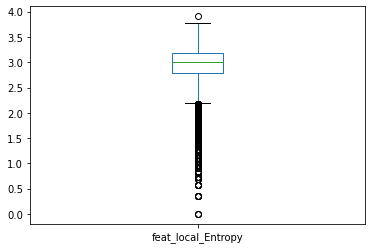

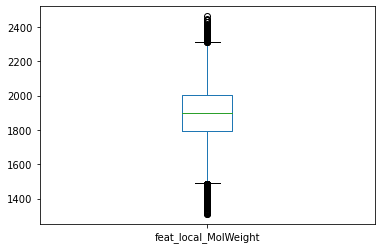

In [11]:
###
# showOutliers(feature) - function used to show the graph of the outliers of a certain feature within the dataset
# it retrieves the values of a certain feature and it plots them on a Box Plot
###
def showOutliers(feature):
    global data
    
    # Initialise the BoxPlot and set the parameters to display the outliners
    data.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

# Show graphs of the outliers before the removal of the features 'feat_local_Entropy' and 'feat_local_MolWeight'
showOutliers('feat_local_Entropy')
showOutliers('feat_local_MolWeight')

In [31]:
###
# removeOutliers(df) - function used to remove the outliers of the dataset features
# it modifies the DataFrame instance by changing the values of the outliers
###
def removeOutliers(df):
    # Loop through each column, except of Class column, and remove the outliers values
    for feature in [column for column in df.columns if column != 'Class']:
        # Calculate the First and Third Quartile, along with the Inter Quartile Range
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Indexes of the records that have the values lower than the First Quartile and higher than the Third Quartile
        Lower_locations = df.index[df[feature] < (Q1 - 1.5 * IQR)]
        Upper_locations = df.index[df[feature] > (Q3 + 1.5 * IQR)]

        # Replace the values of the outliers with the First and Third Quartile values
        df.loc[Lower_locations, [feature]] = Q1
        df.loc[Upper_locations, [feature]] = Q3
        
# Call the remove outliers function
removeOutliers(data)

# Show the graph after the outliers removal of the features 'feat_local_Entropy' and 'feat_local_MolWeight'
showOutliers('feat_local_Entropy')
showOutliers('feat_local_MolWeight')

Number of Values: 76740
Negative Values: 75709 (98.66 %)
Positive Values: 1031 (1.34 %)


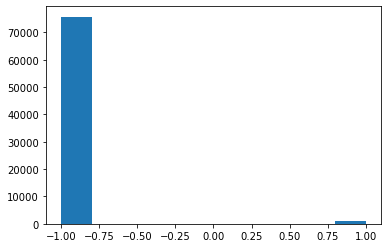

In [13]:
###
# calculateImbalance(label) - function used show the Class Imbalance
# it plots the class imbalance and shows the percentage of Negative/Positive values
###
def showImbalance(label):
    # Plot the Class Imbalance (-1 equals to Negative, +1 equals to Positive)
    plt.hist(label)
    
    # Calculate the number of Negative/Positive values
    total_values = len(label)
    negative_values = label.to_list().count(-1) 
    positive_values = label.to_list().count(+1)
    
    # Calculate the percentage of Negative/Positive values
    negative_percentage = round(negative_values / total_values * 100, 2)
    positive_percentage = round(positive_values / total_values * 100, 2)
    
    # Print the percentage of Negative/Positive values
    print("Number of Values: " + str(total_values))
    print("Negative Values: " + str(negative_values) + " (" + str(negative_percentage) + " %)")
    print("Positive Values: " + str(positive_values) + " (" + str(positive_percentage) + " %)")
    
# Call the function to show the Class Imbalance
showImbalance(label)

In [14]:
# Initialise the Random Over Sampler 
random_over_sampler = RandomOverSampler(random_state=0)

# Calculate the variables X and Y by fitting the data on the Random Over Sampler model
X, Y = random_over_sampler.fit_resample(data, label)

# Create the Instance data again, by using the values of the variables X and Y
data = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)

# Show the first 5 records of the sampled DataFrame
data.head()

,Info_cluster,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,feat_local_AAtypes_Acidic,feat_local_Atoms_nC,feat_local_Atoms_nH,feat_local_Atoms_nN,feat_local_Atoms_nO,feat_local_Atoms_nS,feat_local_AAC_A,feat_local_AAC_R,feat_local_AAC_N,feat_local_AAC_D,feat_local_AAC_C,feat_local_AAC_E,feat_local_AAC_Q,feat_local_AAC_G,feat_local_AAC_H,feat_local_AAC_I,feat_local_AAC_L,feat_local_AAC_K,feat_local_AAC_M,feat_local_AAC_F,feat_local_AAC_P,feat_local_AAC_S,feat_local_AAC_T,feat_local_AAC_W,feat_local_AAC_Y,feat_local_AAC_V,feat_local_CTDC_hydrophobicity.Group1,feat_local_CTDC_hydrophobicity.Group2,feat_local_CTDC_hydrophobicity.Group3,feat_local_CTDC_normwaalsvolume.Group1,feat_local_CTDC_normwaalsvolume.Group2,feat_local_CTDC_normwaalsvolume.Group3,feat_local_CTDC_polarity.Group1,feat_local_CTDC_polarity.Group2,feat_local_CTDC_polarity.Group3,feat_local_CTDC_polarizability.Group1,feat_local_CTDC_polarizability.Group2,feat_local_CTDC_polarizability.Group3,feat_local_CTDC_charge.Group1,feat_local_CTDC_charge.Group2,feat_local_CTDC_charge.Group3,feat_local_CTDC_secondarystruct.Group1,feat_local_CTDC_secondarystruct.Group2,feat_local_CTDC_secondarystruct.Group3,feat_local_CTDC_solventaccess.Group1,feat_local_CTDC_solventaccess.Group2,feat_local_CTDC_solventaccess.Group3,feat_local_CTDD_prop1.G1.residue0,feat_local_CTDD_prop1.G1.residue25,feat_local_CTDD_prop1.G1.residue50,feat_local_CTDD_prop1.G1.residue75,feat_local_CTDD_prop1.G1.residue100,feat_local_CTDD_prop1.G2.residue0,feat_local_CTDD_prop1.G2.residue25,feat_local_CTDD_prop1.G2.residue50,feat_local_CTDD_prop1.G2.residue75,feat_local_CTDD_prop1.G2.residue100,feat_local_CTDD_prop1.G3.residue0,feat_local_CTDD_prop1.G3.residue25,feat_local_CTDD_prop1.G3.residue50,feat_local_CTDD_prop1.G3.residue75,feat_local_CTDD_prop1.G3.residue100,feat_local_CTDD_prop2.G1.residue0,feat_local_CTDD_prop2.G1.residue25,feat_local_CTDD_prop2.G1.residue50,feat_local_CTDD_prop2.G1.residue75,feat_local_CTDD_prop2.G1.residue100,feat_local_CTDD_prop2.G2.residue0,feat_local_CTDD_prop2.G2.residue25,feat_local_CTDD_prop2.G2.residue50,feat_local_CTDD_prop2.G2.residue75,feat_local_CTDD_prop2.G2.residue100,feat_local_CTDD_prop2.G3.residue0,feat_local_CTDD_prop2.G3.residue25,feat_local_CTDD_prop2.G3.residue50,feat_local_CTDD_prop2.G3.residue75,feat_local_CTDD_prop2.G3.residue100,feat_local_CTDD_prop3.G1.residue0,feat_local_CTDD_prop3.G1.residue25,feat_local_CTDD_prop3.G1.residue50,feat_local_CTDD_prop3.G1.residue75,feat_local_CTDD_prop3.G1.residue100,feat_local_CTDD_prop3.G2.residue0,feat_local_CTDD_prop3.G2.residue25,feat_local_CTDD_prop3.G2.residue50,feat_local_CTDD_prop3.G2.residue75,feat_local_CTDD_prop3.G2.residue100,feat_local_CTDD_prop3.G3.residue0,feat_local_CTDD_prop3.G3.residue25,feat_local_CTDD_prop3.G3.residue50,feat_local_CTDD_prop3.G3.residue75,feat_local_CTDD_prop3.G3.residue100,feat_local_CTDD_prop4.G1.residue0,feat_local_CTDD_prop4.G1.residue25,feat_local_CTDD_prop4.G1.residue50,feat_local_CTDD_prop4.G1.residue75,feat_local_CTDD_prop4.G1.residue100,feat_local_CTDD_prop4.G2.residue0,feat_local_CTDD_prop4.G2.residue25,feat_local_CTDD_prop4.G2.residue50,feat_local_CTDD_prop4.G2.residue75,feat_local_CTDD_prop4.G2.residue100,feat_local_CTDD_prop4.G3.residue0,feat_local_CTDD_prop4.G3.residue25,feat_local_CTDD_prop4.G3.residue50,feat_local_CTDD_prop4.G3.residue75,feat_local_CTDD_prop4.G3.residue100,feat_local_CTDD_prop5.G1.residue0,feat_local_CTDD_prop5.G1.residue25,feat_local_CTDD_prop5.G1.residue50,feat_local_CTDD_prop5.G1.residue75,feat_local_CTDD_prop5.G1.residue100,feat_local_CTDD_prop5.G2.residue0,feat_local_CTDD_prop5.G2.residue25,feat_local_CTDD_prop5.G2.residue50,feat_local_CTDD_prop5.G2.residue75,feat_local_CTDD_prop5.G2.residue100,feat_local_CTDD_prop5.G3.residue0,feat_local_CTDD_prop5.G3.r

Number of Values: 151418
Negative Values: 75709 (50.0 %)
Positive Values: 75709 (50.0 %)


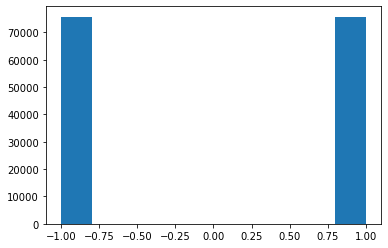

In [15]:
# Call the function to show the Class Imbalance - result: Classes are balanced
showImbalance(data["Class"])

In [16]:
# Calculate the DataFrame with the quantile data
data = data.groupby('Info_cluster').quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Show the first 10 records of the quantiled DataFrame
data.head(10)

feat_local_Entropy  feat_local_MolWeight  \
Info_cluster                                                 
2.0          0.0            2.289246              1550.670   
             0.1            2.365596              1655.680   
             0.2            2.422580              1682.630   
             0.3            2.656565              1694.640   
             0.4            2.789898              1704.640   
             0.5            2.872906              1732.700   
             0.6            3.006239              1843.930   
             0.7            3.139572              1921.970   
             0.8            3.240224              1958.038   
             0.9            3.373557              1996.040   

                  feat_local_AAtypes_Tiny  feat_local_AAtypes_Small  \
Info_cluster                                                          
2.0          0.0                 0.066667                  0.200000   
             0.1                 0.333333                  0.533333   
             0.2                 0.333333                  0.600000   
             0.3                 0.400000                  0.666667   
             0.4                 0.466667                  0.733333   
             0.5                 0.600000                  0.866667   
             0.6                 0.600000                  0.866667   
             0.7                 0.666667                  0.866667   
             0.8                 0.666667                  0.933333   
             0.9                 0.666667                  0.933333   

                  feat_local_AAtypes_Aliphatic  feat_local_AAtypes_Aromatic  \
Info_cluster                                                                  
2.0          0.0                      0.066667                     0.000000   
             0.1                      0.133333                     0.066667   
             0.2                      0.133333                     0.066667   
             0.3                      0.133333                     0.066667   
             0.4                      0.200000                     0.066667   
             0.5                      0.200000                     0.066667   
             0.6                      0.200000                     0.133333   
             0.7                      0.200000                     0.133333   
             0.8                      0.266667                     0.133333   
             0.9                      0.333333                     0.200000   

                  feat_local_AAtypes_NonPolar  feat_local_AAtypes_Polar  \
Info_cluster                                                              
2.0          0.0                     0.266667                  0.133333   
             0.1                     0.333333                  0.400000   
             0.2                     0.333333                  0.466667   
             0.3                     0.333333                  0.533333   
             0.4                     0.400000                  0.533333   
             0.5                     0.400000                  0.600000   
             0.6                     0.466667                  0.600000   
             0.7                     0.466667                  0.666667   
             0.8                     0.533333                  0.666667   
             0.9                     0.600000                  0.666667   

                  feat_local_AAtypes_Charged  feat_local_AAtypes_Basic  \
Info_cluster                                                             
2.0          0.0                    0.000000                  0.000000   
             0.1                    0.066667                  0.066667   
             0.2                    0.133333                  0.066667   
             0.3                    0.133333                  0.066667   
             0.4                    0.133333                  0.066667   
             0.5                    0.200000        

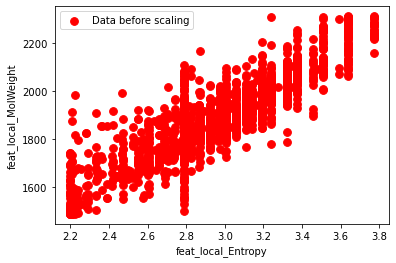

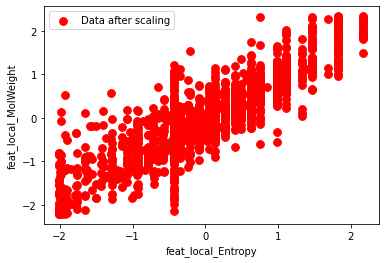

In [17]:
###
# calculateStandardScaler() - function used to calculate the Standard Scaler on the DataFrame
# the method takes the DataFrame and it calculates the Standard Scaler of it, and ultimately it returns it
###
def calculateStandardScaler():
    global data
    
    # Instance of the Standard Scaler
    scaler = StandardScaler()
    
    # Fit the the DataFrame on the Standard Scaler and return it
    return pd.DataFrame(scaler.fit_transform(data.drop('Class', axis=1)), columns=data.drop('Class', axis=1).columns)

###
# plotData(df, columns, header) - function that shows the differences between the original and the scaled DataFrame
# it plots a scatter diagram to show the differences in the values recurrency and the range of them
###
def plotData(df, columns, header):
    # Plot the scatter diagram
    df.plot.scatter(x=columns[0], y=columns[1], marker='o', s=60, label=header, color='red')

# Call the function to calculate the Standard Scaler and save the result of it
scaled_data = calculateStandardScaler()

# Call the functions to plot the scatter diagram showing both the data before and after scaling
plotData(data, ['feat_local_Entropy', 'feat_local_MolWeight'], 'Data before scaling')
plotData(scaled_data, ['feat_local_Entropy', 'feat_local_MolWeight'], 'Data after scaling')

In [18]:
###
# calculateBoruta() - function used to calculate the Boruta Selector
# the method takes the DataFrame and produces an instance of the Boruta Selector
###
def calculateBoruta():
    global scaled_data, data

    # Instance of the Random Forest used to train the Boruta Selector
    rfc = RFC(random_state=1, n_estimators=1000, max_depth=5)
    
    # Instance of the Boruta Selector
    boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)

    # Fit the Data Frame on the Boruta Selector
    boruta_selector.fit(np.array(scaled_data), np.array(data['Class']))
    
    # Return the Boruta Selector
    return boruta_selector

# Call the function to calculate the Boruta Selector Model and save it
boruta_selector = calculateBoruta()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	385
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	385
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	385
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	385
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	385
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	385
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	385
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	217
Tentative: 	123
Rejected: 	45
Iteration: 	9 / 100
Confirmed: 	217
Tentative: 	123
Rejected: 	45
Iteration: 	10 / 100
Confirmed: 	217
Tentative: 	123
Rejected: 	45
Iteration: 	11 / 100
Confirmed: 	217
Tentative: 	123
Rejected: 	45
Iteration: 	12 / 100
Confirmed: 	227
Tentative: 	113
Rejected: 	45
Iteration: 	13 / 100
Confirmed: 	227
Tentative: 	113
Rejected: 	45
Iteration: 	14 / 100
Confirmed: 	227
Tentative: 	104
Rejected: 	54
Iteration: 	15 / 100
Confirmed: 	227
Tentative: 	104
Rejected: 	54
Iteration: 	16 / 100
Conf

In [19]:
###
# transformBoruta(boruta_selector) - function used to transform the Boruta model into a DataFrame
# the method takes the Boruta Model and it returns the DataFrame of its transformation
###
def transformBoruta(boruta_selector):
    global scaled_data, data
    
    # Calculate the features and the target columns of the DataFrame
    boruta_X = pd.DataFrame(boruta_selector.transform(np.array(scaled_data)))
    boruta_Y = pd.DataFrame(data['Class'])
    
    # Print the information of the features/target columns
    boruta_X.info()
    boruta_Y.info()
    
    # Return the DataFrame of the Boruta Model
    return {'X': boruta_X, 'Y': boruta_Y}

# Call the function to calculate the Training DataFrame of the Boruta Model
df_train = transformBoruta(boruta_selector)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Columns: 258 entries, 0 to 257
dtypes: float64(258)
memory usage: 3.0 MB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1507 entries, (2.0, 0.0) to (342.0, 1.0)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   1507 non-null   float64
dtypes: float64(1)
memory usage: 17.7 KB


In [59]:
###
# compareModels(df_train) - function used to compare the possible classifiers applied on the Boruta Selector
# the method takes the DataFrame calculated by the Boruta Selector and check possible Model Accuracy of them
###
def compareModels(df_train):
    # Split data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(df_train['X'], df_train['Y'], test_size=0.2, random_state=42)
    
    # Create a list of the classifiers/models that are used
    classifier_list = [LR, DTC, RFC, KNC, GNB]
    model_list = ['LR', 'DTC', 'RFC', 'KNC', 'GNB']
    
    # Create a list to store the accuracy values of the models
    accuracy_list = []
    score_list = []
    
    # Loop throught the possible classifiers to assess the accuracy of them against the training data
    for classifier in classifier_list:
        # Initiate the model of the classifier and fit the model with the training data and labels
        model = classifier()
        model.fit(x_train, y_train)
        
        # Temporarely store the results of the classifier in a file
        with open(model_list[classifier_list.index(classifier)], 'wb') as file:
            pickle.dump(model, file)
            
        # Calculate the Accuracy of the predictions that are done by the test data and store into a list
        test_accuracy_result = model.score(x_test, y_test)
        score_result = f1_score(y_test, model.predict(x_test), average='macro')
        
        # Append the values of the Model Accuracy and the F1 Score on the list
        accuracy_list.append(test_accuracy_result)
        score_list.append(score_result)
        
    # Create a DataFrame used to print the Name, Test Accuracy and F1 Score of the model
    df_result = pd.DataFrame({
        'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes'],
        'Test Accuracy': accuracy_list,
        'F1 Score': score_list
    });
    
    # Print the result DataFrame
    print(df_result)
    
# Call the function used to compare the different results obtained by the different classifiers
compareModels(df_train)

                 Model  Test Accuracy  F1 Score
0  Logistic Regression       0.940397  0.901350
1        Decision Tree       0.920530  0.866618
2        Random Forest       0.956954  0.922721
3  K-Nearest Neighbors       0.930464  0.864148
4          Naive Bayes       0.516556  0.473893


# Test of the trained Model

In [74]:
# Import the Data used to Test the model
testing_data = pd.read_csv('/Users/nikki/Desktop/Hackathon/data_for_activity/df_holdout.csv')

# Show the first 5 records of the Testing DataFrame
testing_data.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,Info_window,Info_cluster,Info_split,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,feat_local_AAtypes_Acidic,feat_local_Atoms_nC,feat_local_Atoms_nH,feat_local_Atoms_nN,feat_local_Atoms_nO,feat_local_Atoms_nS,feat_local_AAC_A,feat_local_AAC_R,feat_local_AAC_N,feat_local_AAC_D,feat_local_AAC_C,feat_local_AAC_E,feat_local_AAC_Q,feat_local_AAC_G,feat_local_AAC_H,feat_local_AAC_I,feat_local_AAC_L,feat_local_AAC_K,feat_local_AAC_M,feat_local_AAC_F,feat_local_AAC_P,feat_local_AAC_S,feat_local_AAC_T,feat_local_AAC_W,feat_local_AAC_Y,feat_local_AAC_V,feat_local_CTDC_hydrophobicity.Group1,feat_local_CTDC_hydrophobicity.Group2,feat_local_CTDC_hydrophobicity.Group3,feat_local_CTDC_normwaalsvolume.Group1,feat_local_CTDC_normwaalsvolume.Group2,feat_local_CTDC_normwaalsvolume.Group3,feat_local_CTDC_polarity.Group1,feat_local_CTDC_polarity.Group2,feat_local_CTDC_polarity.Group3,feat_local_CTDC_polarizability.Group1,feat_local_CTDC_polarizability.Group2,feat_local_CTDC_polarizability.Group3,feat_local_CTDC_charge.Group1,feat_local_CTDC_charge.Group2,feat_local_CTDC_charge.Group3,feat_local_CTDC_secondarystruct.Group1,feat_local_CTDC_secondarystruct.Group2,feat_local_CTDC_secondarystruct.Group3,feat_local_CTDC_solventaccess.Group1,feat_local_CTDC_solventaccess.Group2,feat_local_CTDC_solventaccess.Group3,feat_local_CTDD_prop1.G1.residue0,feat_local_CTDD_prop1.G1.residue25,feat_local_CTDD_prop1.G1.residue50,feat_local_CTDD_prop1.G1.residue75,feat_local_CTDD_prop1.G1.residue100,feat_local_CTDD_prop1.G2.residue0,feat_local_CTDD_prop1.G2.residue25,feat_local_CTDD_prop1.G2.residue50,feat_local_CTDD_prop1.G2.residue75,feat_local_CTDD_prop1.G2.residue100,feat_local_CTDD_prop1.G3.residue0,feat_local_CTDD_prop1.G3.residue25,feat_local_CTDD_prop1.G3.residue50,feat_local_CTDD_prop1.G3.residue75,feat_local_CTDD_prop1.G3.residue100,feat_local_CTDD_prop2.G1.residue0,feat_local_CTDD_prop2.G1.residue25,feat_local_CTDD_prop2.G1.residue50,feat_local_CTDD_prop2.G1.residue75,feat_local_CTDD_prop2.G1.residue100,feat_local_CTDD_prop2.G2.residue0,feat_local_CTDD_prop2.G2.residue25,feat_local_CTDD_prop2.G2.residue50,feat_local_CTDD_prop2.G2.residue75,feat_local_CTDD_prop2.G2.residue100,feat_local_CTDD_prop2.G3.residue0,feat_local_CTDD_prop2.G3.residue25,feat_local_CTDD_prop2.G3.residue50,feat_local_CTDD_prop2.G3.residue75,feat_local_CTDD_prop2.G3.residue100,feat_local_CTDD_prop3.G1.residue0,feat_local_CTDD_prop3.G1.residue25,feat_local_CTDD_prop3.G1.residue50,feat_local_CTDD_prop3.G1.residue75,feat_local_CTDD_prop3.G1.residue100,feat_local_CTDD_prop3.G2.residue0,feat_local_CTDD_prop3.G2.residue25,feat_local_CTDD_prop3.G2.residue50,feat_local_CTDD_prop3.G2.residue75,feat_local_CTDD_prop3.G2.residue100,feat_local_CTDD_prop3.G3.residue0,feat_local_CTDD_prop3.G3.residue25,feat_local_CTDD_prop3.G3.residue50,feat_local_CTDD_prop3.G3.residue75,feat_local_CTDD_prop3.G3.residue100,feat_local_CTDD_prop4.G1.residue0,feat_local_CTDD_prop4.G1.residue25,feat_local_CTDD_prop4.G1.residue50,feat_local_CTDD_prop4.G1.residue75,feat_local_CTDD_prop4.G1.residue100,feat_local_CTDD_prop4.G2.residue0,feat_local_CTDD_prop4.G2.residue25,feat_local_CTDD_prop4.G2.residue50,feat_local_CTDD_prop4.G2.residue75,feat_local_CTDD_prop4.G2.residue100,feat_local_CTDD_prop4.G3.residue0,feat_local_CTDD_prop4.G3.residue25,feat_local_CTDD_prop4.G3.residue50,feat_local_CTDD_prop4.G3.residue75,feat_local_CTDD_prop4.G3.residue100,feat_local_CTDD_prop5.G1.residue0,feat_local_CTDD_prop5.G1.residue25,feat_local_CTDD_prop5.G1.residue50,feat_local_CTDD_prop5.G1.residue75,feat_local_CTDD_prop5.G1.residue100,feat_local_CTDD_prop5.G2.residue0,feat_local_CTDD_prop5.G2.residue25,feat_local_CTDD_pr

In [75]:
# Save the values of two Info_ variables before removing them from the testing set
Info_PepID = testing_data['Info_protein_id']
Info_pos = testing_data['Info_pos']

# Loop through each column of the Testing DataFrame in order to remove the irrelevant columns
for column in testing_data.columns:
    # Drop the column in the case in which it starts with Info_ 
    if 'Info_' in column:
        testing_data = testing_data.drop(column, axis = 1)

# Show the first 5 records of the Testing DataFrame after the removal of the irrelevant columns
testing_data.head()

,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,feat_local_AAtypes_Acidic,feat_local_Atoms_nC,feat_local_Atoms_nH,feat_local_Atoms_nN,feat_local_Atoms_nO,feat_local_Atoms_nS,feat_local_AAC_A,feat_local_AAC_R,feat_local_AAC_N,feat_local_AAC_D,feat_local_AAC_C,feat_local_AAC_E,feat_local_AAC_Q,feat_local_AAC_G,feat_local_AAC_H,feat_local_AAC_I,feat_local_AAC_L,feat_local_AAC_K,feat_local_AAC_M,feat_local_AAC_F,feat_local_AAC_P,feat_local_AAC_S,feat_local_AAC_T,feat_local_AAC_W,feat_local_AAC_Y,feat_local_AAC_V,feat_local_CTDC_hydrophobicity.Group1,feat_local_CTDC_hydrophobicity.Group2,feat_local_CTDC_hydrophobicity.Group3,feat_local_CTDC_normwaalsvolume.Group1,feat_local_CTDC_normwaalsvolume.Group2,feat_local_CTDC_normwaalsvolume.Group3,feat_local_CTDC_polarity.Group1,feat_local_CTDC_polarity.Group2,feat_local_CTDC_polarity.Group3,feat_local_CTDC_polarizability.Group1,feat_local_CTDC_polarizability.Group2,feat_local_CTDC_polarizability.Group3,feat_local_CTDC_charge.Group1,feat_local_CTDC_charge.Group2,feat_local_CTDC_charge.Group3,feat_local_CTDC_secondarystruct.Group1,feat_local_CTDC_secondarystruct.Group2,feat_local_CTDC_secondarystruct.Group3,feat_local_CTDC_solventaccess.Group1,feat_local_CTDC_solventaccess.Group2,feat_local_CTDC_solventaccess.Group3,feat_local_CTDD_prop1.G1.residue0,feat_local_CTDD_prop1.G1.residue25,feat_local_CTDD_prop1.G1.residue50,feat_local_CTDD_prop1.G1.residue75,feat_local_CTDD_prop1.G1.residue100,feat_local_CTDD_prop1.G2.residue0,feat_local_CTDD_prop1.G2.residue25,feat_local_CTDD_prop1.G2.residue50,feat_local_CTDD_prop1.G2.residue75,feat_local_CTDD_prop1.G2.residue100,feat_local_CTDD_prop1.G3.residue0,feat_local_CTDD_prop1.G3.residue25,feat_local_CTDD_prop1.G3.residue50,feat_local_CTDD_prop1.G3.residue75,feat_local_CTDD_prop1.G3.residue100,feat_local_CTDD_prop2.G1.residue0,feat_local_CTDD_prop2.G1.residue25,feat_local_CTDD_prop2.G1.residue50,feat_local_CTDD_prop2.G1.residue75,feat_local_CTDD_prop2.G1.residue100,feat_local_CTDD_prop2.G2.residue0,feat_local_CTDD_prop2.G2.residue25,feat_local_CTDD_prop2.G2.residue50,feat_local_CTDD_prop2.G2.residue75,feat_local_CTDD_prop2.G2.residue100,feat_local_CTDD_prop2.G3.residue0,feat_local_CTDD_prop2.G3.residue25,feat_local_CTDD_prop2.G3.residue50,feat_local_CTDD_prop2.G3.residue75,feat_local_CTDD_prop2.G3.residue100,feat_local_CTDD_prop3.G1.residue0,feat_local_CTDD_prop3.G1.residue25,feat_local_CTDD_prop3.G1.residue50,feat_local_CTDD_prop3.G1.residue75,feat_local_CTDD_prop3.G1.residue100,feat_local_CTDD_prop3.G2.residue0,feat_local_CTDD_prop3.G2.residue25,feat_local_CTDD_prop3.G2.residue50,feat_local_CTDD_prop3.G2.residue75,feat_local_CTDD_prop3.G2.residue100,feat_local_CTDD_prop3.G3.residue0,feat_local_CTDD_prop3.G3.residue25,feat_local_CTDD_prop3.G3.residue50,feat_local_CTDD_prop3.G3.residue75,feat_local_CTDD_prop3.G3.residue100,feat_local_CTDD_prop4.G1.residue0,feat_local_CTDD_prop4.G1.residue25,feat_local_CTDD_prop4.G1.residue50,feat_local_CTDD_prop4.G1.residue75,feat_local_CTDD_prop4.G1.residue100,feat_local_CTDD_prop4.G2.residue0,feat_local_CTDD_prop4.G2.residue25,feat_local_CTDD_prop4.G2.residue50,feat_local_CTDD_prop4.G2.residue75,feat_local_CTDD_prop4.G2.residue100,feat_local_CTDD_prop4.G3.residue0,feat_local_CTDD_prop4.G3.residue25,feat_local_CTDD_prop4.G3.residue50,feat_local_CTDD_prop4.G3.residue75,feat_local_CTDD_prop4.G3.residue100,feat_local_CTDD_prop5.G1.residue0,feat_local_CTDD_prop5.G1.residue25,feat_local_CTDD_prop5.G1.residue50,feat_local_CTDD_prop5.G1.residue75,feat_local_CTDD_prop5.G1.residue100,feat_local_CTDD_prop5.G2.residue0,feat_local_CTDD_prop5.G2.residue25,feat_local_CTDD_prop5.G2.residue50,feat_local_CTDD_prop5.G2.residue75,feat_local_CTDD_prop5.G2.residue100,feat_local_CTDD_prop5.G3.residue0,feat_local_CTDD_prop5.G3.residue25,feat

In [76]:
# Call the function to remove the outliers from the Testing Data
removeOutliers(testing_data)

In [77]:
# Instance of the Standard Scaler of the Testing Data
test_standard_scaling = StandardScaler()

# Fit the Testing Data on the Standard Scaler
test_standard_scaling_data = pd.DataFrame(test_standard_scaling.fit_transform(testing_data), columns=testing_data.columns)

# Show the first 5 records of the Testing Data 
test_standard_scaling_data.head()

,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,feat_local_AAtypes_Acidic,feat_local_Atoms_nC,feat_local_Atoms_nH,feat_local_Atoms_nN,feat_local_Atoms_nO,feat_local_Atoms_nS,feat_local_AAC_A,feat_local_AAC_R,feat_local_AAC_N,feat_local_AAC_D,feat_local_AAC_C,feat_local_AAC_E,feat_local_AAC_Q,feat_local_AAC_G,feat_local_AAC_H,feat_local_AAC_I,feat_local_AAC_L,feat_local_AAC_K,feat_local_AAC_M,feat_local_AAC_F,feat_local_AAC_P,feat_local_AAC_S,feat_local_AAC_T,feat_local_AAC_W,feat_local_AAC_Y,feat_local_AAC_V,feat_local_CTDC_hydrophobicity.Group1,feat_local_CTDC_hydrophobicity.Group2,feat_local_CTDC_hydrophobicity.Group3,feat_local_CTDC_normwaalsvolume.Group1,feat_local_CTDC_normwaalsvolume.Group2,feat_local_CTDC_normwaalsvolume.Group3,feat_local_CTDC_polarity.Group1,feat_local_CTDC_polarity.Group2,feat_local_CTDC_polarity.Group3,feat_local_CTDC_polarizability.Group1,feat_local_CTDC_polarizability.Group2,feat_local_CTDC_polarizability.Group3,feat_local_CTDC_charge.Group1,feat_local_CTDC_charge.Group2,feat_local_CTDC_charge.Group3,feat_local_CTDC_secondarystruct.Group1,feat_local_CTDC_secondarystruct.Group2,feat_local_CTDC_secondarystruct.Group3,feat_local_CTDC_solventaccess.Group1,feat_local_CTDC_solventaccess.Group2,feat_local_CTDC_solventaccess.Group3,feat_local_CTDD_prop1.G1.residue0,feat_local_CTDD_prop1.G1.residue25,feat_local_CTDD_prop1.G1.residue50,feat_local_CTDD_prop1.G1.residue75,feat_local_CTDD_prop1.G1.residue100,feat_local_CTDD_prop1.G2.residue0,feat_local_CTDD_prop1.G2.residue25,feat_local_CTDD_prop1.G2.residue50,feat_local_CTDD_prop1.G2.residue75,feat_local_CTDD_prop1.G2.residue100,feat_local_CTDD_prop1.G3.residue0,feat_local_CTDD_prop1.G3.residue25,feat_local_CTDD_prop1.G3.residue50,feat_local_CTDD_prop1.G3.residue75,feat_local_CTDD_prop1.G3.residue100,feat_local_CTDD_prop2.G1.residue0,feat_local_CTDD_prop2.G1.residue25,feat_local_CTDD_prop2.G1.residue50,feat_local_CTDD_prop2.G1.residue75,feat_local_CTDD_prop2.G1.residue100,feat_local_CTDD_prop2.G2.residue0,feat_local_CTDD_prop2.G2.residue25,feat_local_CTDD_prop2.G2.residue50,feat_local_CTDD_prop2.G2.residue75,feat_local_CTDD_prop2.G2.residue100,feat_local_CTDD_prop2.G3.residue0,feat_local_CTDD_prop2.G3.residue25,feat_local_CTDD_prop2.G3.residue50,feat_local_CTDD_prop2.G3.residue75,feat_local_CTDD_prop2.G3.residue100,feat_local_CTDD_prop3.G1.residue0,feat_local_CTDD_prop3.G1.residue25,feat_local_CTDD_prop3.G1.residue50,feat_local_CTDD_prop3.G1.residue75,feat_local_CTDD_prop3.G1.residue100,feat_local_CTDD_prop3.G2.residue0,feat_local_CTDD_prop3.G2.residue25,feat_local_CTDD_prop3.G2.residue50,feat_local_CTDD_prop3.G2.residue75,feat_local_CTDD_prop3.G2.residue100,feat_local_CTDD_prop3.G3.residue0,feat_local_CTDD_prop3.G3.residue25,feat_local_CTDD_prop3.G3.residue50,feat_local_CTDD_prop3.G3.residue75,feat_local_CTDD_prop3.G3.residue100,feat_local_CTDD_prop4.G1.residue0,feat_local_CTDD_prop4.G1.residue25,feat_local_CTDD_prop4.G1.residue50,feat_local_CTDD_prop4.G1.residue75,feat_local_CTDD_prop4.G1.residue100,feat_local_CTDD_prop4.G2.residue0,feat_local_CTDD_prop4.G2.residue25,feat_local_CTDD_prop4.G2.residue50,feat_local_CTDD_prop4.G2.residue75,feat_local_CTDD_prop4.G2.residue100,feat_local_CTDD_prop4.G3.residue0,feat_local_CTDD_prop4.G3.residue25,feat_local_CTDD_prop4.G3.residue50,feat_local_CTDD_prop4.G3.residue75,feat_local_CTDD_prop4.G3.residue100,feat_local_CTDD_prop5.G1.residue0,feat_local_CTDD_prop5.G1.residue25,feat_local_CTDD_prop5.G1.residue50,feat_local_CTDD_prop5.G1.residue75,feat_local_CTDD_prop5.G1.residue100,feat_local_CTDD_prop5.G2.residue0,feat_local_CTDD_prop5.G2.residue25,feat_local_CTDD_prop5.G2.residue50,feat_local_CTDD_prop5.G2.residue75,feat_local_CTDD_prop5.G2.residue100,feat_local_CTDD_prop5.G3.residue0,feat_local_CTDD_prop5.G3.residue25,feat

In [78]:
# Use the Boruta Model to transform the Scaled Data of the Testing Set
test_transform_data = boruta_selector.transform(np.array(test_standard_scaling_data))

# Retrieve the RFC Prediction Model
with open('RFC', 'rb') as file:
    model_RFC = pickle.load(file)

# Prediction Model of the Testing Set - using the RFC Model, as it shows the highest accuracy rate
test_prediction_model = model_RFC.predict(test_transform_data)

In [79]:
# Calculate the Number of Predicted records that have a positive and negative class 
unique, counts = np.unique(test_prediction_model, return_counts=True)

# Print the number of Predicted results
print(counts)

[  2705 112415]


In [80]:
###
# savePredictions() - function used to save the predictions on the Predictions.csv file
# the method takes the prediction model and save the results on the CSV file
###
def savePredictions():
    global Info_PepID, Info_pos
    
    # DataFrame of the Predictions
    prediction_df = pd.concat([Info_PepID, Info_pos, pd.Series(test_prediction_model)], 
                              axis=1, 
                              keys=['Info_protein', 'Info_position', 'Predicted_Class'])

    # Save the predictions on the CSV file
    prediction_df.to_csv('Predictions.csv', encoding='utf-8', index=False)
    
# Call the function to save the Predictions 
savePredictions()

# Conclusion
The train data fit well with Random Forest Classifier, among the given algorithms, with a test acuracy of 0.95 and an F1 Score of 0.92. So we used the same Random Forest model to test on the holdout data. The data was made to go through all the preprocessing stages that we have done on the train data. The model predicted 2705 -1 classes and 112415 1 classes.